# Sacramento Housing - Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('redfin_prep.csv')

<AxesSubplot:xlabel='price', ylabel='Count'>

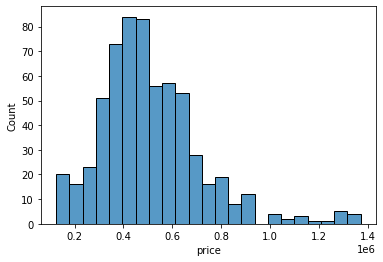

In [3]:
sns.histplot(data=df['price'])

In [4]:
# average home price
df['price'].mean()

508904.0775444265

In [5]:
# average number of beds
df['beds'].mean()

3.27140549273021

In [6]:
# average number of baths
df['baths'].mean()

2.27140549273021

In [7]:
#average square footage
df['sq_ft'].mean()

1820.6995153473345

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    619 non-null    object 
 1   baths      619 non-null    float64
 2   beds       619 non-null    float64
 3   brokerage  619 non-null    object 
 4   price      619 non-null    int64  
 5   sq_ft      619 non-null    int64  
 6   zip_code   619 non-null    int64  
 7   city       619 non-null    object 
 8   street     619 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 43.6+ KB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    619 non-null    object 
 1   baths      619 non-null    float64
 2   beds       619 non-null    float64
 3   brokerage  619 non-null    object 
 4   price      619 non-null    int64  
 5   sq_ft      619 non-null    int64  
 6   zip_code   619 non-null    int64  
 7   city       619 non-null    object 
 8   street     619 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 43.6+ KB


In [10]:
df.head()

,address,baths,beds,brokerage,price,sq_ft,zip_code,city,street
0,"2025 Rockbridge Rd, Sacramento, CA 95815",2.0,4.0,Redfin Corporation,369900,1121,95815,Sacramento,2025 Rockbridge Rd
1,"8377 Almadine Dr, Sacramento, CA 95829",2.0,3.0,Redfin Corporation,569900,1843,95829,Sacramento,8377 Almadine Dr
2,"10216 Rockingham Dr, Sacramento, CA 95827",2.0,4.0,Redfin Corporation,319900,1587,95827,Sacramento,10216 Rockingham Dr
3,"3158 Callecita St, Sacramento, CA 95815",2.0,3.0,Redfin Corporation,349000,1318,95815,Sacramento,3158 Callecita St
4,"2280 Hurley Way #66, Sacramento, CA 95825",2.0,2.0,Redfin Corporation,229900,1105,95825,Sacramento,2280 Hurley Way #66


 ## Assumptions
 > * address, city, street, & zip_code have some colinearity
 > * there is some underlying linear relationship between location, number of baths, number of beds, and square footage relative to price
 > * there is no discernably inherent ranking system within categorical variables (e.g. not ordinal)

In [11]:
# drop address and street
df.drop(['address','street'],axis=1,inplace=True)

In [12]:
df['brokerage'].nunique()

192

In [13]:
#dropping brokerage as the broker category does not make for good inference
df.drop('brokerage',axis=1,inplace=True)

In [14]:
df.head()

,baths,beds,price,sq_ft,zip_code,city
0,2.0,4.0,369900,1121,95815,Sacramento
1,2.0,3.0,569900,1843,95829,Sacramento
2,2.0,4.0,319900,1587,95827,Sacramento
3,2.0,3.0,349000,1318,95815,Sacramento
4,2.0,2.0,229900,1105,95825,Sacramento


## Statsmodel - OLS

In [15]:
import statsmodels.formula.api as sm

In [16]:
f_rev = 'price~C(zip_code)+C(city)+baths+beds+sq_ft'
model_rev = sm.ols(formula=f_rev,data=df).fit()

In [17]:
model_rev.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     33.74
Date:                Wed, 24 Feb 2021   Prob (F-statistic):          7.27e-125
Time:                        11:55:31   Log-Likelihood:                -8082.4
No. Observations:                 619   AIC:                         1.625e+04
Df Residuals:                     578   BIC:                         1.643e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  2.363e+05   6.14e+04      3.852      0.000    1.16e+05    3.57e+05
C(zip_code)[T.95610]       2.698e+04    2.5e+04      1.081      0.280   -2.21e+04     7.6e+04
C(zip_code)[T.95621]      -1.017e+05   2.61e+04     -3.894      0.000   -1.53e+05   -5.04e+04
C(zip_code)[T.95624]        3.87e+04   2.08e+04      1.858      0.064   -2217.540    7.96e+04
C(zip_code)[T.95628]      -6.178e+04   3.98e+04     -1.551      0.121    -1.4e+05    1.65e+04
C(zip_code)[T.95670]      -1.666e+04   3.62e+04     -0.460      0.646   -8.78e+04    5.45e+04
C(zip_code)[T.95683]       1.117e+05   4.16e+04      2.685      0.007       3e+04    1.93e+05
C(zip_code)[T.95742]       -1.73e+04   3.87e+04     -0.447      0.655   -9.33e+04    5.87e+04
C(zip_code)[T.95757]      -3.143e+04   2.04e+04     -1.539      0.124   -7.15e+04    8693.074
C(zip_code)[T.95758]      -3.683e+04   2.03e+04     -1.815      0.070   -7.67e+04    3027.847
C(zip_code)[T.95811]       2.283e+05   3.38e+04      6.748      0.000    1.62e+05    2.95e+05
C(zip_code)[T.95814]       1.039e+05    3.9e+04      2.661      0.008    2.72e+04    1.81e+05
C(zip_code)[T.95815]      -1.155e+05   3.68e+04     -3.135      0.002   -1.88e+05   -4.31e+04
C(zip_code)[T.95816]       2.621e+05   3.39e+04      7.724      0.000    1.95e+05    3.29e+05
C(zip_code)[T.95817]      -1.004e+04   4.37e+04     -0.230      0.818   -9.58e+04    7.58e+04
C(zip_code)[T.95818]       2.018e+05   2.88e+04      7.012      0.000    1.45e+05    2.58e+05
C(zip_code)[T.95819]       2.485e+05   4.09e+04      6.078      0.000    1.68e+05    3.29e+05
C(zip_code)[T.95820]       -2.29e+04   3.53e+04     -0.648      0.517   -9.23e+04    4.65e+04
C(zip_code)[T.95821]       -8.51e+04   2.42e+04     -3.521      0.000   -1.33e+05   -3.76e+04
C(zip_code)[T.95822]      -1.836e+04   3.33e+04     -0.551      0.582   -8.38e+04     4.7e+04
C(zip_code)[T.95823]      -7.635e+04   3.38e+04     -2.257      0.024   -1.43e+05   -9921.840
C(zip_code)[T.95824]      -7.966e+04   3.27e+04     -2.433      0.015   -1.44e+05   -1.54e+04
C(zip_code)[T.95825]      -9.114e+04   2.04e+04     -4.464      0.000   -1.31e+05    -5.1e+04
C(zip_code)[T.95826]      -6.545e+04   3.38e+04     -1.936      0.053   -1.32e+05     964.659
C(zip_code)[T.95827]      -9.734e+04   3.53e+04     -2.758      0.006   -1.67e+05    -2.8e+04
C(zip_code)[T.95828]      -1.136e+05   2.61e+04     -4.354      0.000   -1.65e+05   -6.24e+04
C(zip_code)[T.95829]       6093.6880   3.37e+04      0.181      0.857   -6.02e+04    7.23e+04
C(zip_code)[T.95830]       2.196e+05   1.14e+05      1.930      0.054   -3908.495    4.43e+05
C(zip_code)[T.95831]       6.163e+04   3.31e+04      1.862      0.063   -3364.289    1.27e+05
C(zip_code)[T.95832]       -1.18e+05   8.06e+04     -1.464      0.144   -2.

## Sklearn - Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [19]:
df_dum = pd.get_dummies(data=df,columns=['zip_code','city'],drop_first=True)

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df_dum.drop('price',axis=1) 
y = df_dum['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
lr_model = lr.fit(X_train,y_train)

## Metrics

In [23]:
predictions = lr_model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

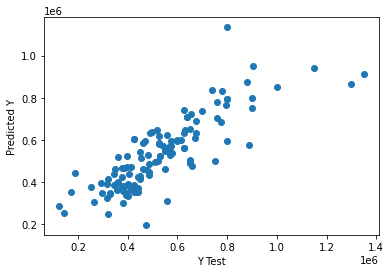

In [24]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

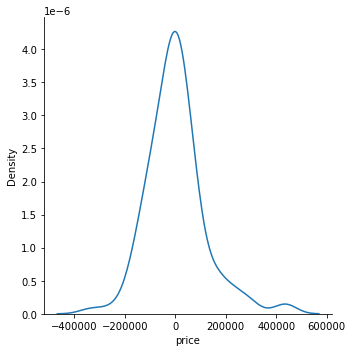

In [25]:
residuals = y_test - predictions
sns.displot(data=residuals, kind='kde')

In [26]:
from sklearn import metrics

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 79661.39390981685
MAPE: 0.1723366239723726
MSE: 13229561397.354887
RMSE: 115019.83045264363


In [28]:
X.columns
column_names = ['baths', 'beds', 'sq_ft', 'zip_code_95610', 'zip_code_95621',
       'zip_code_95624', 'zip_code_95628', 'zip_code_95670', 'zip_code_95683',
       'zip_code_95742', 'zip_code_95757', 'zip_code_95758', 'zip_code_95811',
       'zip_code_95814', 'zip_code_95815', 'zip_code_95816', 'zip_code_95817',
       'zip_code_95818', 'zip_code_95819', 'zip_code_95820', 'zip_code_95821',
       'zip_code_95822', 'zip_code_95823', 'zip_code_95824', 'zip_code_95825',
       'zip_code_95826', 'zip_code_95827', 'zip_code_95828', 'zip_code_95829',
       'zip_code_95830', 'zip_code_95831', 'zip_code_95832', 'zip_code_95833',
       'zip_code_95834', 'zip_code_95835', 'zip_code_95838', 'zip_code_95841',
       'zip_code_95842', 'zip_code_95864', 'city_Citrus Heights',
       'city_Elk Grove', 'city_Fair Oaks', 'city_Gold River',
       'city_Rancho Cordova', 'city_Sacramento', 'city_Sloughhouse']

In [29]:
coefficients = pd.DataFrame(lr_model.coef_,column_names)
coefficients.columns = ['Coefficients']

In [30]:
coefficients.sort_values(by=['Coefficients'],ascending=False)

,Coefficients
zip_code_95816,276247.297715
zip_code_95819,260798.914927
zip_code_95830,231705.111798
zip_code_95811,219429.892563
zip_code_95818,206062.112279
zip_code_95864,146479.135052
zip_code_95814,114104.718030
city_Sloughhouse,104903.710663
zip_code_95683,104903.710663
zip_code_95831,77697.601197


## Export SKlearn Linear Regression Model to pkl file

In [31]:
import joblib

In [32]:
#joblib.dump(lr_model,'lr_model.pkl')